In [1]:
"""
Created on Mon Mar 26 09:56:02 2018

@author: tvo88
"""

import numpy as np
import math
import matplotlib.pyplot as pl

%matplotlib inline

In [21]:
c = 3e8
lam = 5e-7
L_4k = 4000
L_100k = 100000

tau4k = 2*L_4k/c  
tau100k = 2*L_100k/c  

In [19]:
def Sinc_Func(f, tau):
    out = f.copy()
    for i in range(len(out)):
        x = f[i]*tau
        out[i] =  tau/lam * 2 * np.pi *c * (math.sin(np.pi *x)/(np.pi*x)) * np.exp(1j*np.pi * f[i] * tau)
    return out

C:\Users\tvo88\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: ComplexWarning: Casting complex values to real discards the imaginary part
  """


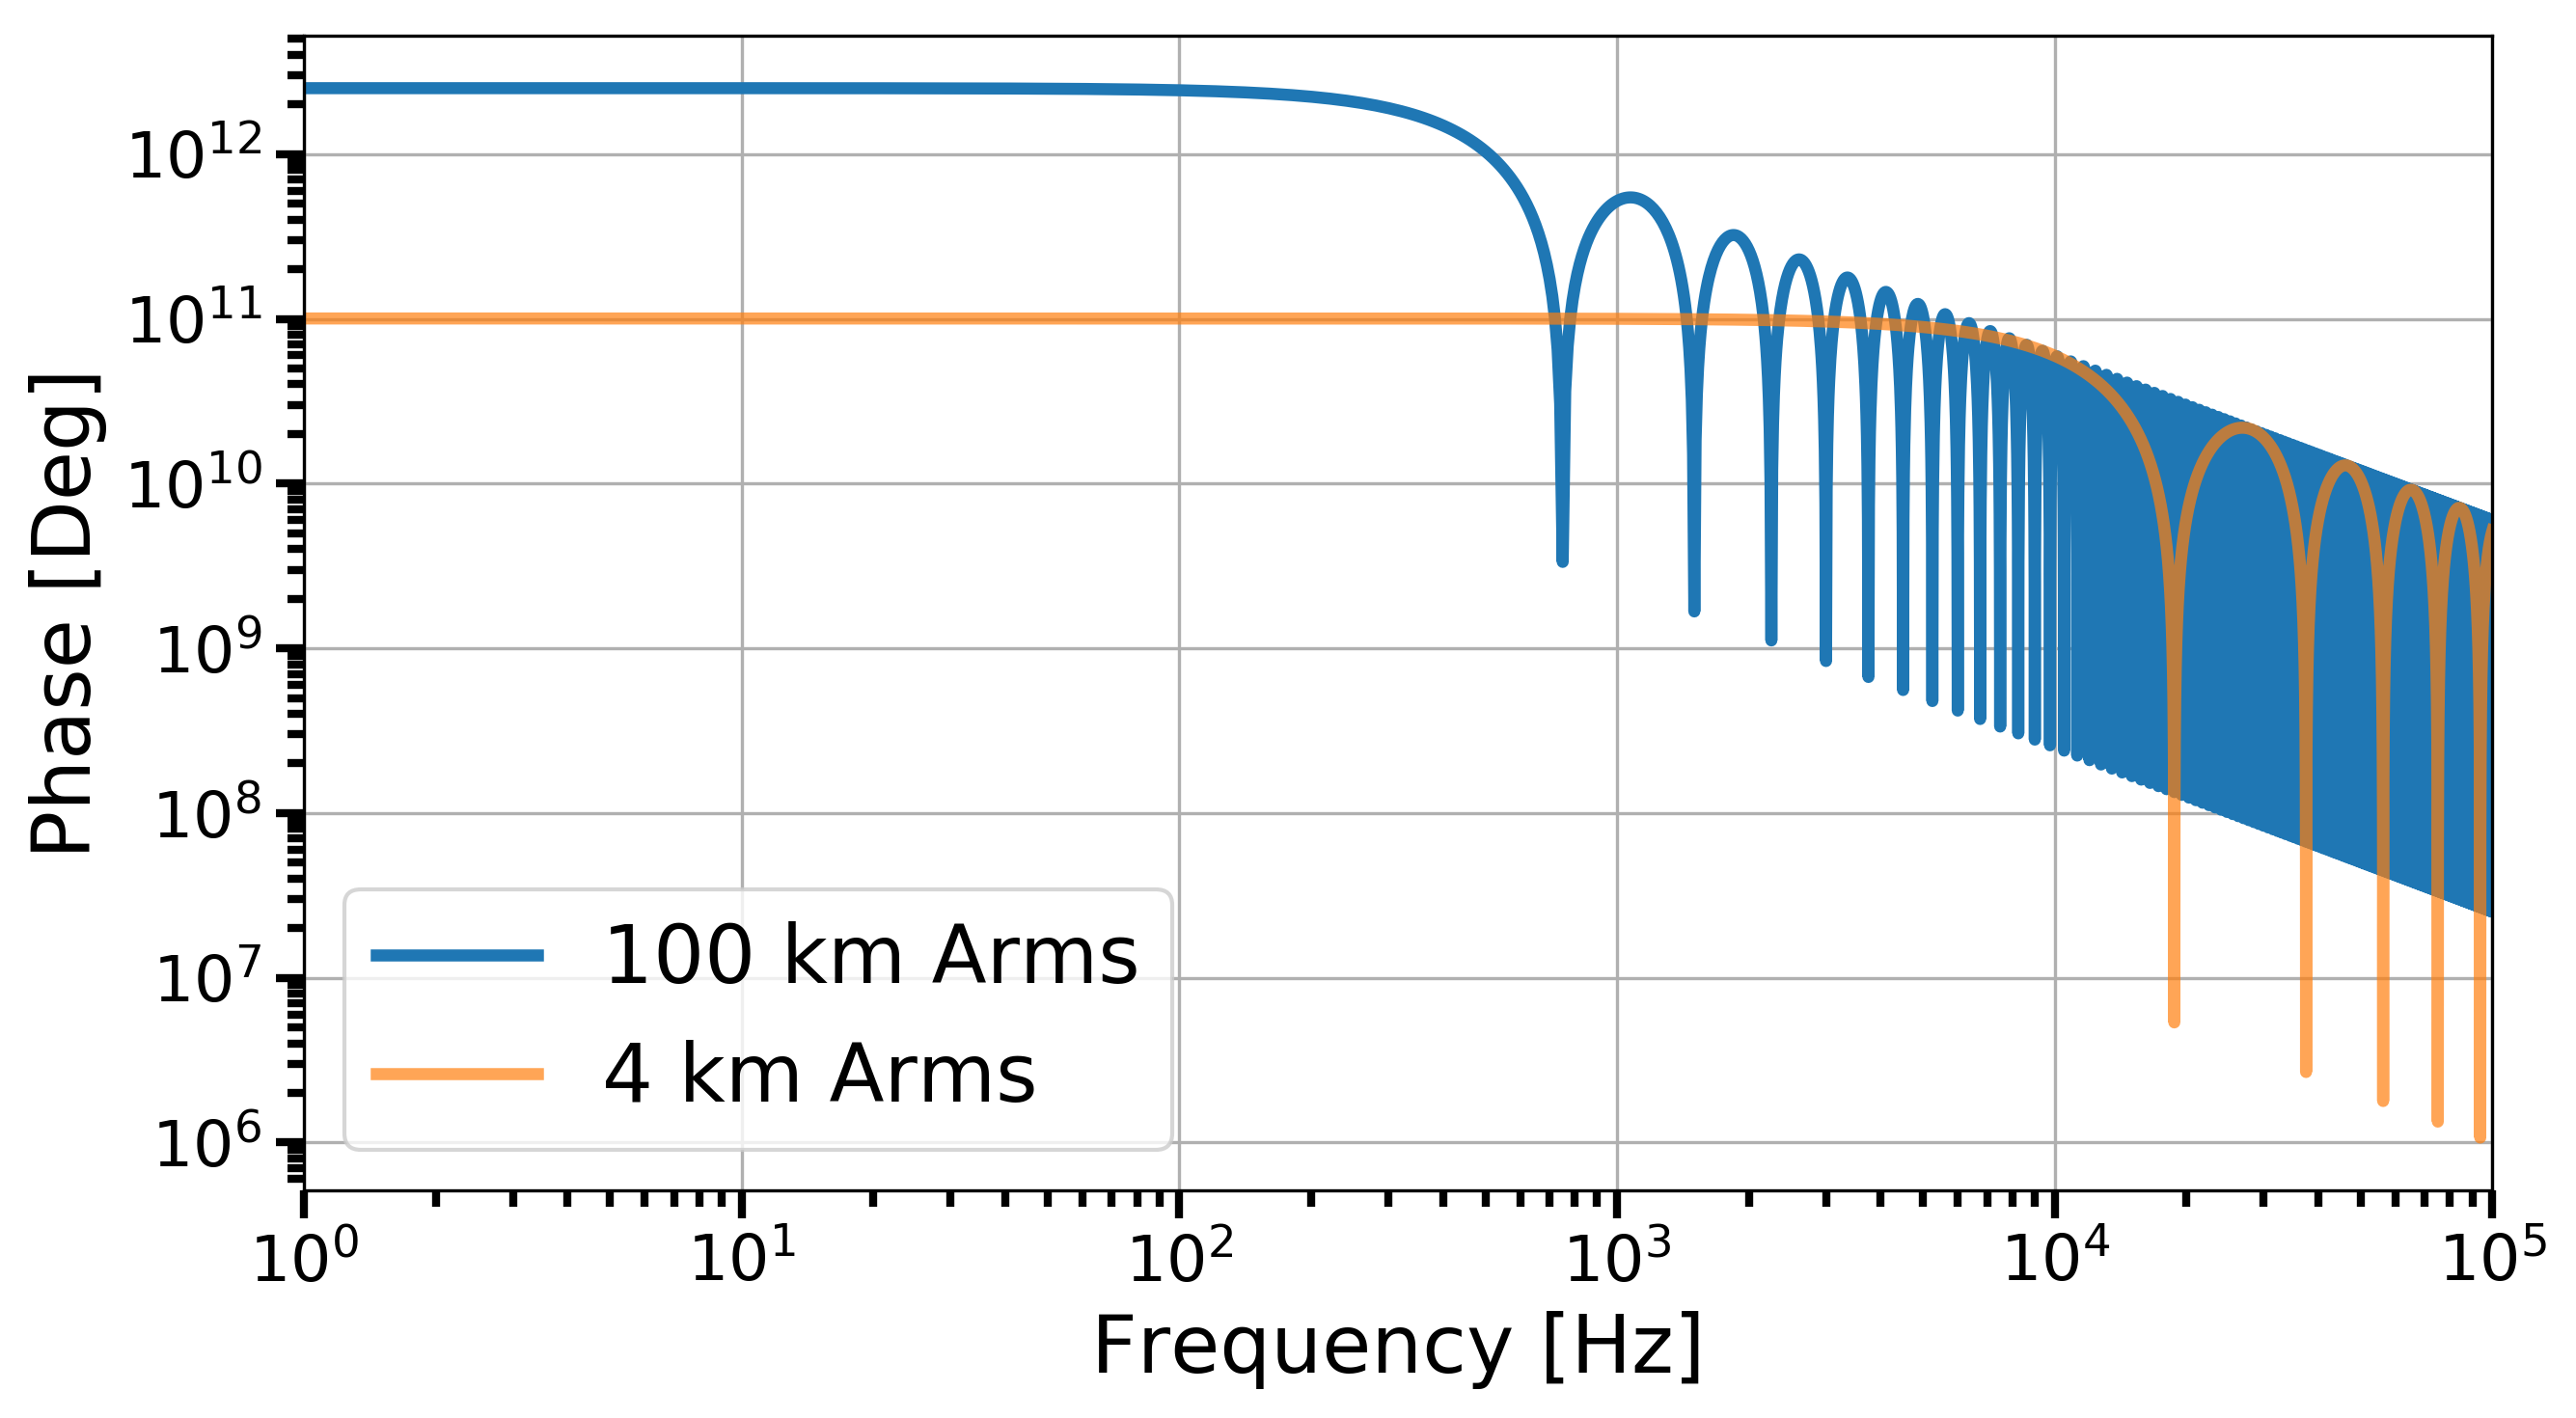

In [34]:
f = np.arange(1.,100000.,10.)

phis_4k = Sinc_Func(f,tau4k)
phis_100k = Sinc_Func(f,tau100k)

pl.figure(figsize=(9, 5), dpi=300)


pl.loglog(f,np.absolute(phis_100k), '-',linewidth=3, label='100 km Arms')
pl.loglog(f,np.absolute(phis_4k), '-',linewidth=3, label='4 km Arms',alpha=0.7)

pl.xlabel("Frequency [Hz]",fontsize=20)
pl.ylabel("Phase [Deg]",fontsize=20)

pl.xlim(f[0],f[-1])

###Main plot formatting
pl.tick_params(labelsize=16)
pl.tick_params(which='both', width=2)
pl.tick_params(which='major', length=7)
pl.tick_params(which='minor', length=4)

pl.grid(True, zorder=-1)
pl.legend(fontsize=20)

pl.tight_layout()

pl.savefig('../../../Figures/SincGW.png')